In [ ]:
!pip install tensorflow matplotlib opencv-python



In [21]:
import tensorflow as tf
import os
import cv2
import imghdr
import matplotlib

In [22]:
gpus =tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Loading and manupilating data

In [24]:
data_dir = 'data'
image_exts =['jpeg','jpg','bmp','png']

In [25]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path =os.path.join(data_dir ,image_class,image)
        try:
            img =cv2.imread(image_path)
            tip =imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list{}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image{}'.format(image_path))

High Risk (first 28)
Low Risk (first 52)


In [26]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 121 files belonging to 2 classes.


In [29]:
data_iterator =data.as_numpy_iterator()

In [30]:
#get another batch
batch =data_iterator.next()

In [31]:
#images rep as numpy
#class 1 = low
#class 0 = high
batch[1]

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0])

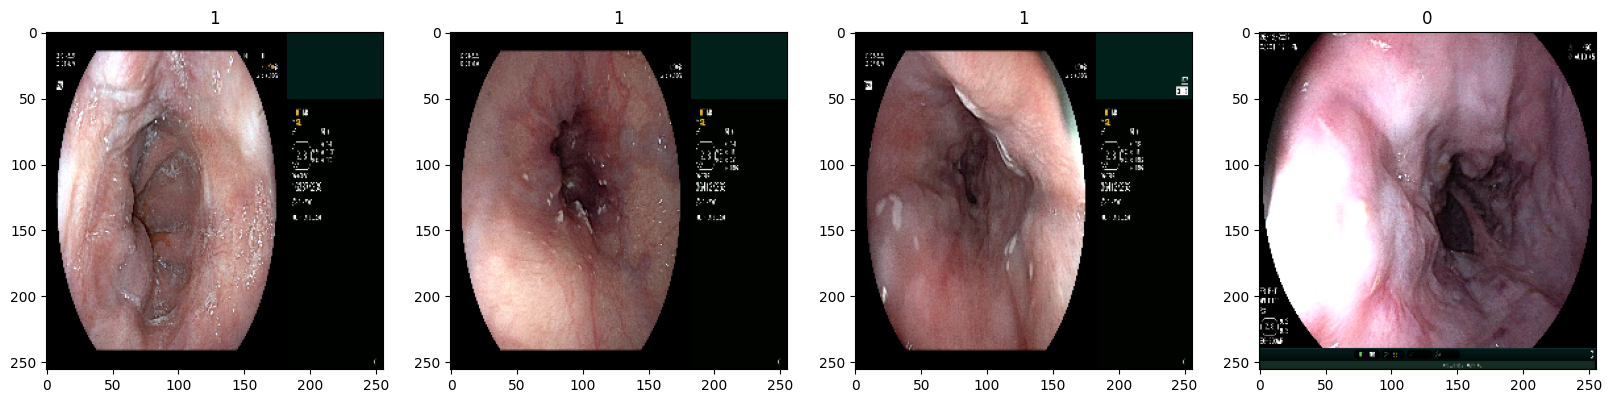

In [32]:
fig,ax =plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprosessing data

Data scaling

In [33]:
data=data.map(lambda x,y:(x/255,y))

In [34]:
scaled_iterator=data.as_numpy_iterator()

In [35]:
batch =scaled_iterator.next()

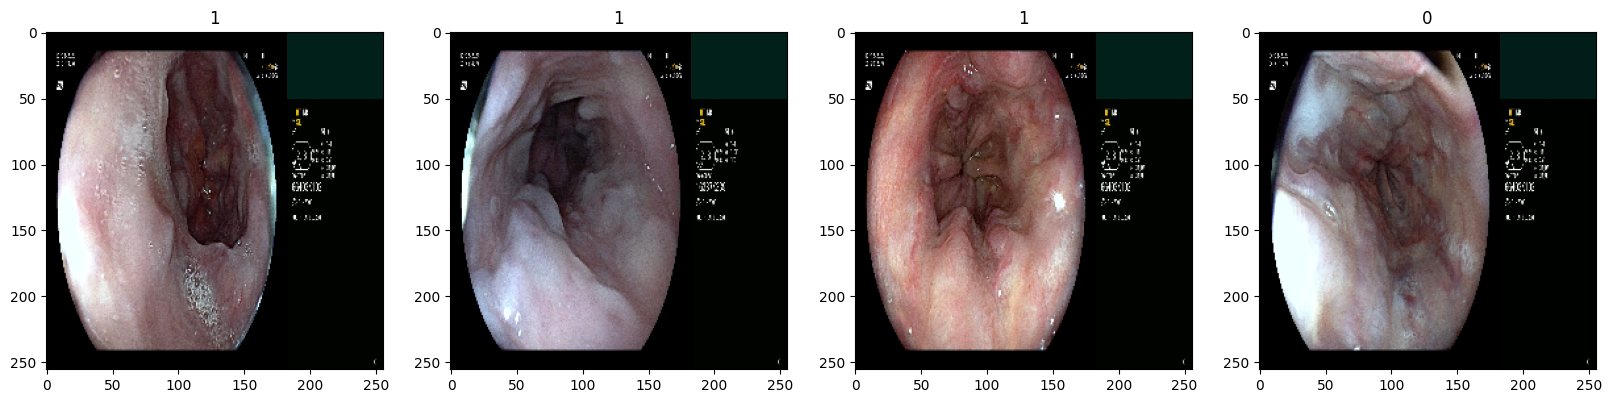

In [36]:
fig,ax =plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

splitting data


In [38]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size =int(len(data)*.1)+1

In [40]:
train= data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

Making a DLM

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Flatten,Dropout

In [42]:
model=Sequential()

In [43]:

model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

training

In [46]:
logdir='logs'

In [47]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
hist = model.fit(train,epochs=100,validation_data=val)

Epoch 1/100


2/2 [==============================] - 2s 595ms/step - loss: 0.8110 - accuracy: 0.5625 - val_loss: 0.6277 - val_accuracy: 0.7188
Epoch 2/100
2/2 [==============================] - 1s 509ms/step - loss: 0.7647 - accuracy: 0.4688 - val_loss: 0.6872 - val_accuracy: 0.5312
Epoch 3/100
2/2 [==============================] - 1s 517ms/step - loss: 0.6510 - accuracy: 0.5938 - val_loss: 0.6022 - val_accuracy: 0.6875
Epoch 4/100
2/2 [==============================] - 1s 485ms/step - loss: 0.6854 - accuracy: 0.6094 - val_loss: 0.6027 - val_accuracy: 0.6875
Epoch 5/100
2/2 [==============================] - 1s 493ms/step - loss: 0.6500 - accuracy: 0.6406 - val_loss: 0.5827 - val_accuracy: 0.7500
Epoch 6/100
2/2 [==============================] - 1s 489ms/step - loss: 0.6435 - accuracy: 0.6719 - val_loss: 0.6524 - val_accuracy: 0.5938
Epoch 7/100
2/2 [==============================] - 1s 507ms/step - loss: 0.6620 - accuracy: 0.5938 - val_loss: 0.6669 - val_accuracy: 0.6250
Epoch 8/100

<function matplotlib.pyplot.show(close=None, block=None)>

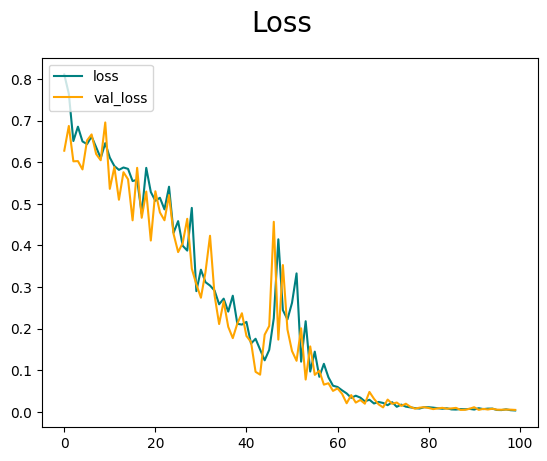

In [49]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

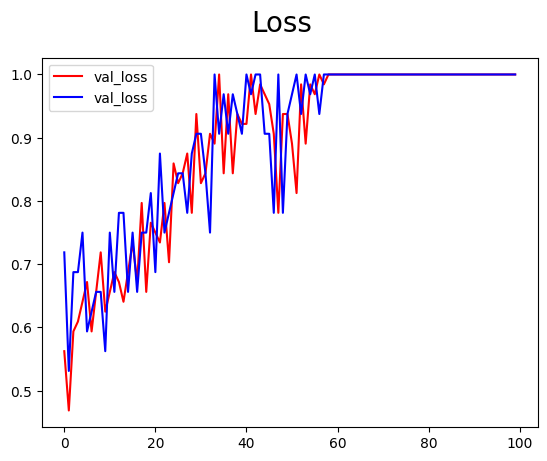

In [50]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='red',label='val_loss')
plt.plot(hist.history['val_accuracy'],color='blue',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show

Performance evaluation

In [51]:
from tensorflow.keras.metrics  import Precision,Recall,BinaryAccuracy

In [52]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator():
    x,y =batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)


1/1 [==============================] - 0s 123ms/step


In [54]:
print(f'precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

precision:1.0,Recall:1.0,Accuracy:1.0


testing

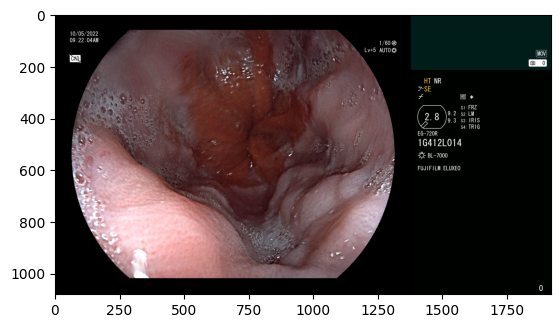

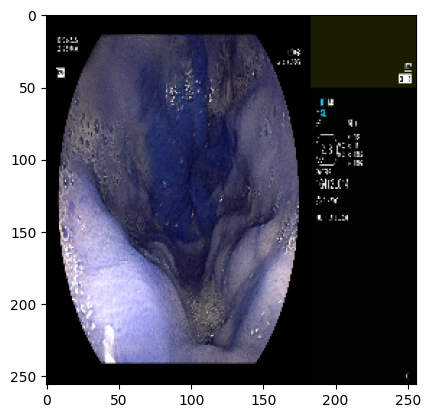

In [63]:
img=cv2.imread('testing_images/test6.Jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
resizeimg=tf.image.resize(img,(256,256))
plt.imshow(resizeimg.numpy().astype(int))
plt.show()

In [64]:
probab=model.predict(np.expand_dims(resizeimg/255,0))
probab


1/1 [==============================] - 0s 22ms/step


array([[0.69853044]], dtype=float32)

Saving the model

In [59]:
from tensorflow.keras.models import load_model
model.save(os.path.join('Models','esophagealvarice.h5'))

C:\Users\Asus Tuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
new_model=load_model(os.path.join('Models','esophagealvarice.h5'))
probab=new_model.predict(np.expand_dims(resizeimg/255,0))
if probab > 0.7:
    print("High risk varice! Banding is definitely required.")
elif probab > 0.5:
    print("High risk varice with chances of bleeding. Final diagnosis by doctor required.")
else:
    print("Low risk varice with low chances of bleeding.")

1/1 [==============================] - 0s 74ms/step
High risk varice with chances of bleeding. Final diagnosis by doctor required.
